In [2]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;} 
div.cell.code_cell.rendered{width:100%;} 
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:14pt;} 
div.text_cell_render.rendered_html{font-size:14pt;} 
div.output {font-size:14pt; font-weight:bold;} 
div.input {font-family:Consolas; font-size:14pt;} 
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;} 
div.text_cell_render ul li{font-size:12pt;padding:5px;} 
table.dataframe{font-size:12px;}
</style>
"""))

<b><font size="6" color="red">ch10. N차원 배열(Numpy 배열) 다루기</font></b>
# 4절 복사와 뷰
## 4.1 할당

In [31]:
import numpy as np
a = np.arange(12)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [32]:
b = a

In [33]:
a.shape, a.ndim, id(a), type(a)

((12,), 1, 3202579114256, numpy.ndarray)

In [34]:
b.shape, b.ndim, id(b), type(b)

((12,), 1, 3202579114256, numpy.ndarray)

In [35]:
a is b    # 같은 객체면 true

True

In [36]:
a == b

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [37]:
np.all(a == b)

True

In [38]:
b.shape = (3,4) # 할당받은 b의 shape을 수정 

In [39]:
a.shape, a.ndim, id(a), type(a)

((3, 4), 2, 3202579114256, numpy.ndarray)

In [40]:
b.shape, b.ndim, id(b), type(b)

((3, 4), 2, 3202579114256, numpy.ndarray)

In [41]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [42]:
b

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

## 4.2 얕은복사 : 뷰(View)

In [43]:
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [44]:
c = a.view()     # 얕은 복사 - 틀만복사
print(id(a), id(c))

3202579114064 3202579115504


In [45]:
c == a

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [46]:
c.shape = (2,6)
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [47]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [48]:
c[1,::2] = -99
c

array([[  0,   1,   2,   3,   4,   5],
       [-99,   7, -99,   9, -99,  11]])

In [49]:
a

array([[  0,   1,   2,   3],
       [  4,   5, -99,   7],
       [-99,   9, -99,  11]])

## 4.3 깊은 복사

In [29]:
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [42]:
a = np.array([[5,  4, 13, 0],
              [99, 6, 16, 1],
              [20, 5, 14, 0]])
a

array([[ 5,  4, 13,  0],
       [99,  6, 16,  1],
       [20,  5, 14,  0]])

In [43]:
# X = a[:, :-1]  # 슬라이싱이 될 때, 뷰가 봔환됨(얕은 복사 - 창만 복사되는 것:원본데이터가 유지되지 못함)
X = a[:, :-1].copy()  # 깊은 복사(원본이 바뀌지 않는다.)
X = np.array(a[:, :-1], copy=True) # 거의 쓰이지 않는 방식
X

array([[ 5,  4, 13],
       [99,  6, 16],
       [20,  5, 14]])

In [44]:
X[:, 0] = -9
X

array([[-9,  4, 13],
       [-9,  6, 16],
       [-9,  5, 14]])

In [45]:
a

array([[ 5,  4, 13,  0],
       [99,  6, 16,  1],
       [20,  5, 14,  0]])

# 5절 고급인덱싱
## 5.1 인덱스 배열로 인덱싱

In [51]:
import numpy as np
a = np.arange(12)**2
a

array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121])

In [52]:
a[[0,5, 9]]

array([ 0, 25, 81])

In [53]:
# 인덱싱하기 위한 값을 배열로 만듦
i = np.array([0,1,1,9])
a[i] # 결과는 i(인덱싱배열)의 형태로 따라 감

array([ 0,  1,  1, 81])

In [54]:
i = np.array([[0, 1],
              [1,9]])
a[i]

array([[ 0,  1],
       [ 1, 81]])

In [55]:
a[i] = 10
a

array([ 10,  10,   4,   9,  16,  25,  36,  49,  64,  10, 100, 121])

In [56]:
a[i] += 10 # 1번 인덱스는 한번만 10 증가
a

array([ 20,  20,   4,   9,  16,  25,  36,  49,  64,  20, 100, 121])

In [57]:
# 색상                 R  G  B
palette = np.array([[0, 0, 0],    # black
                    [255, 0, 0],  # red
                    [0, 255, 0],  # green
                    [0, 0, 255],  # blue
                    [255, 255, 255]]) # white

In [58]:
image_index = np.array([[4,4,4,0,0,0,0,4,4,4],
                        [4,0,0,4,4,4,4,0,0,4],
                        [0,0,4,4,4,4,4,4,0,0],
                        [0,4,4,1,4,4,3,4,4,0],
                        [0,4,4,1,4,4,3,4,4,0],
                        [0,4,4,4,4,4,4,4,4,0],
                        [0,4,4,2,4,4,2,4,4,0],
                        [4,0,4,4,2,2,4,4,0,4],
                        [4,4,0,4,4,4,4,0,4,4],
                        [4,4,4,0,0,0,0,4,4,4]])
image_data = palette[image_index]
image_data.shape

(10, 10, 3)

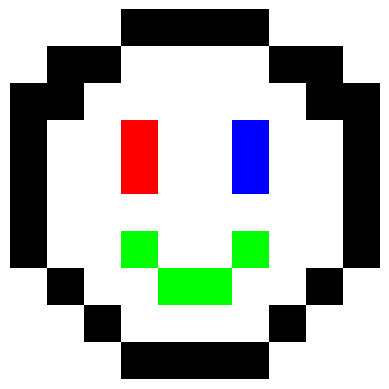

In [59]:
from matplotlib import pyplot as plt
# import matplotlib.pyplot as plt
plt.imshow(image_data)
plt.axis('off')
plt.show()

## 5.2 논리 배열을 이용한 인덱싱

In [60]:
a = np.arange(20)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [61]:
a%2==0

array([ True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False])

In [62]:
a[a%2==0]  # 논리 배역을 이용한 인덱싱시 True인 요소만 추출

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [63]:
a[a>15]

array([16, 17, 18, 19])

# 6절 선형대수
- 2차원 넘파이 배열을 행렬
    * 행렬곱 : @
    * 단위행렬 : np.eye(n) : n행n열 단위행렬
    * 전치행렬 : X.T, X.transpose() : 행과 열을 바꾼것
    * 역행렬 : np.linalg.inv(X)

In [64]:
a = np.array([[1,2],   # a에 역행렬을 행렬곱하면 단위행렬이 된다.
              [3,4]])
a

array([[1, 2],
       [3, 4]])

In [65]:
# a의 역행렬 : a의 역행렬 @ a = 단위행렬
np.linalg.inv(a)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [66]:
np.linalg.inv(a)@a

array([[ 1.00000000e+00,  4.44089210e-16],
       [-5.55111512e-17,  1.00000000e+00]])

In [67]:
# 정방행렬이 아니면 역행렬을 구할 수 없다.
a = np.array([[1,2,1],   
              [3,4,1]])
# np.linalg.inv(a)  에러
a.T @ a

array([[10, 14,  4],
       [14, 20,  6],
       [ 4,  6,  2]])

In [68]:
# 전치행렬을 곱하면 정방행렬로
a @ a.T

array([[ 6, 12],
       [12, 26]])

## 6.1 선형 연립 방정식 풀기(단변량 회귀분석) : 독립변수1, 데이터2

## 6.2 선형 연립 방정식 풀기(단변량 회귀분석) :독립변수1, 데이터n개

In [30]:
from sklearn import datasets
iris = datasets.load_iris()
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3